In [4]:


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [6]:
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data) # Shuffling the data before pass to the training or the testimg set

# PASSING THE DATA TO THE TESTING SET (DEV)

data_dev=data[0:1000].T # Slicing the data or getting the first 1000 rows for the testing
Y_dev=data_dev[0]       # Taking the first row(Lable)for the testing correct data
X_dev=data_dev[1:1000]
X_dev=X_dev/255         # Dividing the each pixel by 255 to normalize the pixel value (As pixel values ranges from 0(black) to 255(white) )

# PASSING THE DATA TO THE TRAINING SET (TRAIN)

data_train=data[1000:m].T # Slicing the data or getting the remaining  1000 rows for the training the NN
Y_train=data_train[0]   
X_train=data_train[1:n]
X_train=X_train/255




In [8]:
Y_train

array([9, 5, 6, ..., 7, 6, 9])

In [31]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [32]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [39]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,0.1,1000)

Iteration:  0
[9 0 1 ... 0 8 8] [9 5 6 ... 7 6 9]
0.1418780487804878
Iteration:  10
[9 0 2 ... 0 8 8] [9 5 6 ... 7 6 9]
0.2492439024390244
Iteration:  20
[9 0 2 ... 0 8 7] [9 5 6 ... 7 6 9]
0.3200487804878049
Iteration:  30
[9 0 6 ... 0 8 7] [9 5 6 ... 7 6 9]
0.3947560975609756
Iteration:  40
[9 0 6 ... 7 0 7] [9 5 6 ... 7 6 9]
0.46563414634146344
Iteration:  50
[9 0 6 ... 7 0 7] [9 5 6 ... 7 6 9]
0.523609756097561
Iteration:  60
[9 0 6 ... 7 0 7] [9 5 6 ... 7 6 9]
0.5692926829268292
Iteration:  70
[9 0 6 ... 7 0 9] [9 5 6 ... 7 6 9]
0.6055609756097561
Iteration:  80
[9 0 6 ... 7 0 9] [9 5 6 ... 7 6 9]
0.6340487804878049
Iteration:  90
[9 0 6 ... 7 0 9] [9 5 6 ... 7 6 9]
0.6581951219512195
Iteration:  100
[9 0 6 ... 7 0 9] [9 5 6 ... 7 6 9]
0.6775609756097561
Iteration:  110
[9 0 6 ... 7 0 9] [9 5 6 ... 7 6 9]
0.6937560975609756
Iteration:  120
[9 0 6 ... 7 0 9] [9 5 6 ... 7 6 9]
0.7071463414634146
Iteration:  130
[9 0 6 ... 7 0 9] [9 5 6 ... 7 6 9]
0.7185365853658536
Iteration:  140
[

In [40]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


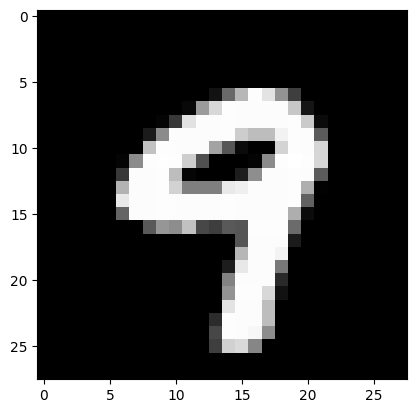

In [41]:
test_prediction(0, W1, b1, W2, b2)


Prediction:  [5]
Label:  5


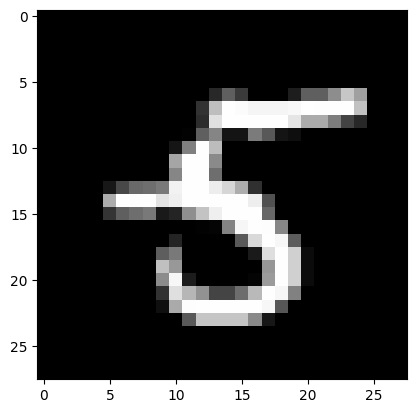

In [42]:
test_prediction(4, W1, b1, W2, b2)